In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_theme()

In [11]:
import os

PLOT_DIR = "example-plots"

if not(os.path.exists(PLOT_DIR)):
    os.mkdir(PLOT_DIR)

In [12]:
# Load data
# results_file = "result-1625148829-all.csv"
# results_file = "result-1624554975-all-exec.csv"
results_file = "20210729-bubblesort-comp.csv"
df_raw = pd.read_csv(f"results/{results_file}")

# df_raw.head()

In [13]:
for col in ["Score", "Score Error (99,9%)"]:
    df_raw[col] = df_raw[col].map(lambda s: s.replace(',', '.'), na_action="ignore").astype(float)

# df_raw

In [41]:
df = df_raw[df_raw.Benchmark.str.endswith("jfr") == False].copy()

In [43]:
df["Stage"] = df["Benchmark"].str.rpartition('.')[2]
df["Problem"] = df["Benchmark"].str.split('.', expand=True).iloc[:, -2]

# df.head()

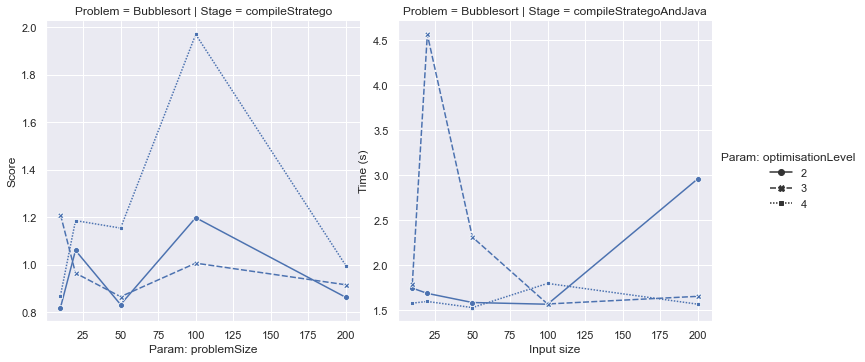

In [44]:
df_scaledproblem = df[df["Param: problemSize"] != -1]

g = sns.relplot(
    data=df_scaledproblem,
    x="Param: problemSize",
    y="Score",
    row="Problem",
    col="Stage",
#     col_order=["compileStratego", "compileJava", "run"],
    style="Param: optimisationLevel",
#     hue="Stage",
    kind="line",
    err_style="band",
    markers=True,
    facet_kws=dict(
        sharex=False, 
        sharey=False,
    ),
)

# TODO Include strj runtime -> with and without fusion

# plt.yscale("log")
plt.ylabel("Time (s)")
plt.xlabel("Input size")

plt.savefig(f"example-plots/BubSort-{results_file}.png", transparent=False)